In [1]:
import os
import cv2
import numpy as np
from random import random
import tensorflow as tf
from random import random, seed
from datetime import datetime

CATEGORIES = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

path = "C:/Users/user/Documents/Code/Machine-Learning/img"
pathSave = "C:/Users/user/Documents/Code/Machine-Learning/imgToCharacters"
pathDataset = "C:/Users/user/Documents/Code/Machine-Learning/my_dataset/train"

list_line = []
list_y = []

borderSize = 10

IMSIZE = 50

In [2]:
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), 0)
    ret, thresh = cv2.threshold(img_array, 127, 255, 0)

In [3]:
kernel = np.ones((4,12),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=25)
border = cv2.copyMakeBorder(erosion, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT, value=[255,255,255])

image, contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if w*h < 600*3000 and w*h > 100*100:
            if x < borderSize:
                x = borderSize
            if y < borderSize:
                y = borderSize
            img_crop = img_array[y:y+h, x:x+w]
            list_line.append(img_crop)
            list_y.append(y)
            cv2.imwrite(os.path.join(pathSave, "img-%s.png" %random()), img_crop)

In [4]:
import matplotlib.pyplot as plt
plt.imshow(border, cmap="gray")
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
array_y_line = []
for i in range(len(list_y)):
    array = [list_y[i], list_line[i]]
    array_y_line.append(array)
    
array_y_line.sort(key=lambda x:x[0])

print(len(array_y_line))

2


In [6]:
array_line_word = []
for y, line in array_y_line:
    img_array = line
    ret, thresh = cv2.threshold(img_array, 127, 255, 0)
    kernel = np.ones((2,5),np.uint8)
    erosion = cv2.erode(thresh, kernel, iterations=30)
    image, contours, hierarchy = cv2.findContours(erosion, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    list_word = []
    list_x = []
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if w*h < 1000*500 and w*h > 10*10:
            img_crop = img_array[y:y+h, x:x+w]
            list_word.append(img_crop)
            list_x.append(x)
    array_word_x = []
    for i in range(len(list_x)):
        array = [list_word[i], list_x[i]]
        array_word_x.append(array)
    
    array_word_x.sort(key=lambda x:x[1])
    array = []
    for word, x in array_word_x:
        array.append(word)
    array_line_word.append(array)

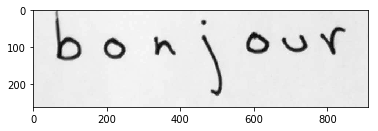

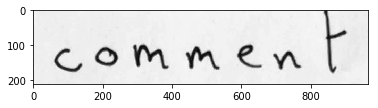

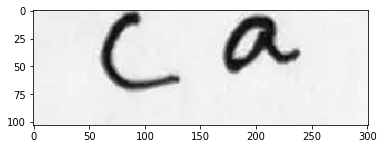

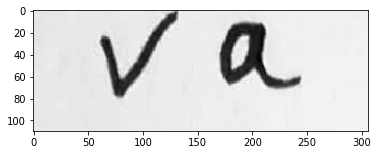

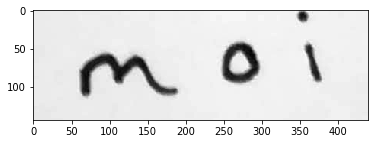

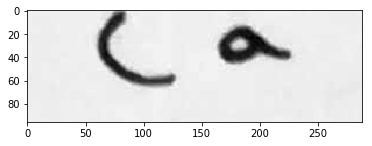

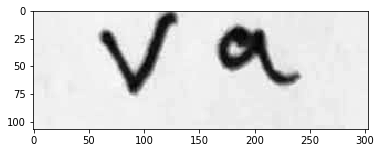

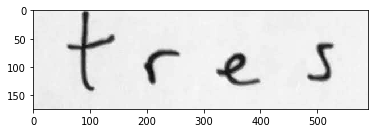

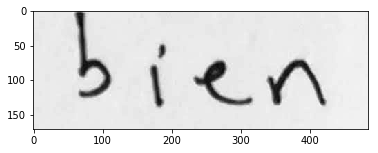

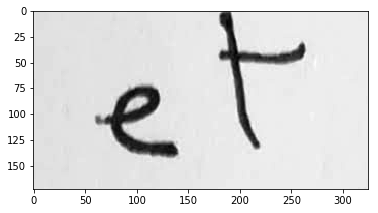

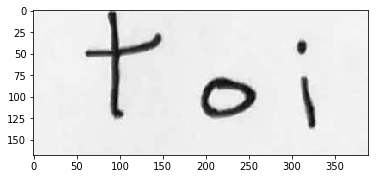

In [7]:
for line in array_line_word:
    for word in line:
        plt.imshow(word,cmap="gray")
        plt.show()

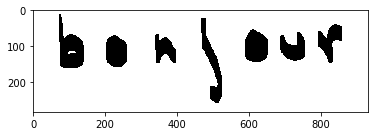

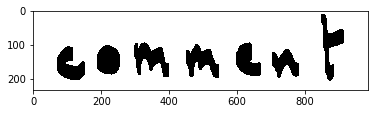

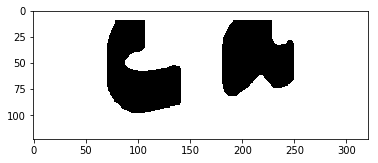

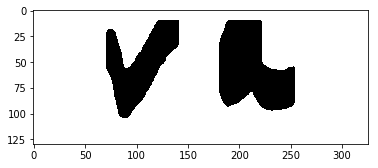

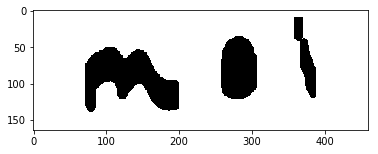

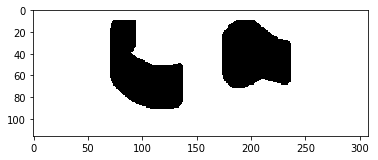

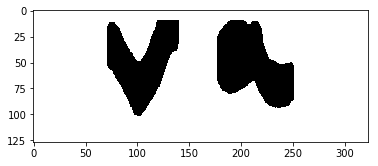

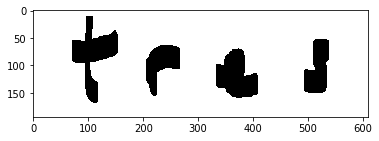

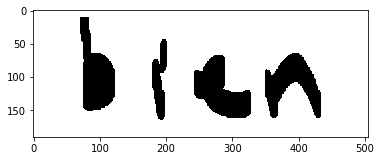

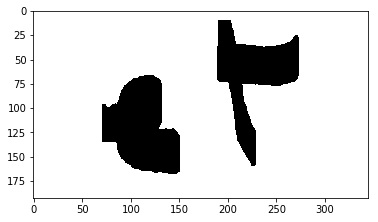

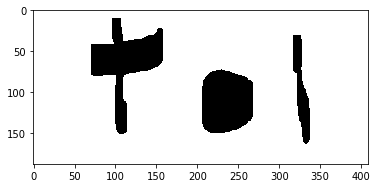

In [8]:
array_line_word_char = []

for line in array_line_word:
    
    array_word_char = []
    
    for word in line:
        
        word_char = []
        
        img_array = word
        ret, thresh = cv2.threshold(img_array, 127, 255, 0)
        kernel = np.ones((33,1),np.uint8)
        erosion = cv2.erode(thresh, kernel, iterations=1)
        border = cv2.copyMakeBorder(erosion, borderSize, borderSize, borderSize, borderSize, cv2.BORDER_CONSTANT, value=[255,255,255])
        plt.imshow(border, cmap="gray")
        plt.show()
        image, contours, hierarchy = cv2.findContours(border, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        
        list_char = []
        list_x = []
        
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            if w*h < 300*100 and w*h > 20*10:
                if x <= borderSize:
                    x = borderSize
                if y <= borderSize:
                    y = borderSize
                img_crop = thresh[y-borderSize:y+h-borderSize, x-borderSize:x+w-borderSize]
                list_char.append(img_crop)
                list_x.append(x)
        
        # Classer
        
        array_char_x = []
        for i in range(len(list_char)):
            array = [list_char[i], list_x[i]]
            array_char_x.append(array)
            
        array_char_x.sort(key=lambda x:x[1])
        
        array = []
        for char, x in array_char_x:
            array.append(char)
        array_word_char.append(array)
        
    array_line_word_char.append(array_word_char)

In [20]:
model = tf.keras.models.load_model("readable-model.model")

In [21]:
array_predictions = []

for line in array_line_word_char:
    for word in line:
        for char in word:
            new_char = cv2.resize(char, (IMSIZE, IMSIZE))
            new_char = np.array(new_char).reshape(-1,50,50,1)
            new_char = new_char / 255.0
            prediction = model.predict(new_char)
            array_predictions.append(CATEGORIES[np.argmax(prediction)])
        array_predictions.append(' ')

text = "".join(array_predictions)
text = text.strip()
print(text)

boajour comment ca va xoi ca va tres tien et toi


In [22]:
real_text = "bonjour comment ca va moi ca va tres bien et toi"

In [23]:
print(len(text.strip()), len(real_text))

48 48


In [24]:
miss = []

text = text.replace(" ", "")
real_text = real_text.replace(" ", "")

if len(text) == len(real_text):
    i = 0
    for line in array_line_word_char:
        for word in line:
            for char in word:
                if text[i] != real_text[i]:
                    miss.append([char, real_text[i]])
                i += 1
                
else:
    print("Erreur mauvaise correction")

print(len(miss))

3


In [25]:
for img, cat in miss:
    print(cat)

n
m
b


In [26]:
seed(datetime.now())

for img, cat in miss:
    t = random()
    pathCat = os.path.join(pathDataset, cat)
    cv2.imwrite(os.path.join(pathCat,"img%s.png"%t, ), img)